<a href="https://colab.research.google.com/github/VishalJangale01/Spark_Internship_data_analytics/blob/main/Spark_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task#1:Predicting Score of students based on number of hours she/he is studying using using Simple Linear regression

**Importing libraries**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Reading the data**

In [38]:
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Data overview**

In [39]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [41]:
print(data.shape)

(25, 2)


In [42]:
print(data.columns)

Index(['Hours', 'Scores'], dtype='object')


In [43]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Now we are plotting the 2d graph to find out the linear realationship between two variables**

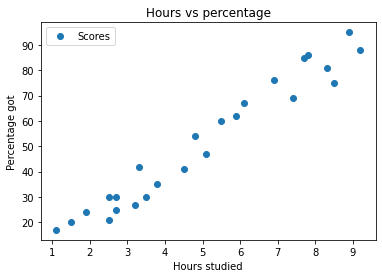

In [44]:
data.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage got")
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.show()

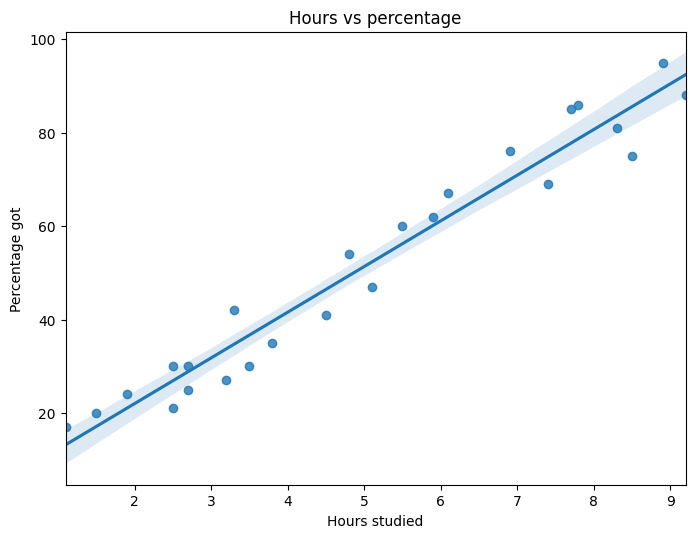

In [45]:
import seaborn as sns
sns.regplot(x=data["Hours"],y=data["Scores"],data=data)
plt.title("Hours vs percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage got")
plt.show()

Here from the above graph we can suggest that there is a positive relationship between two variables
Now we are dividing the data into inputs(features) and outputs(labels)

In [46]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Now we are spltitting the data

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Training our algorithm

In [48]:
from sklearn.linear_model import LinearRegression
z=LinearRegression()
z.fit(x_train,y_train)
print("Training has been completed")

Training has been completed


Drawing a regression line

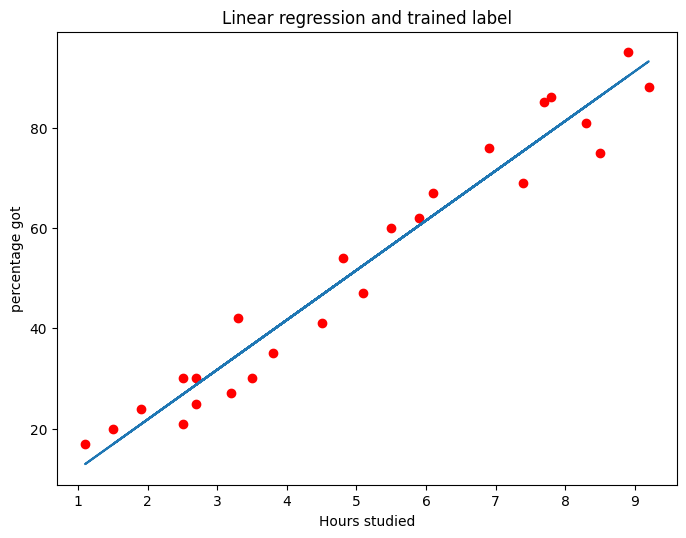

In [49]:
line=z.coef_*x+z.intercept_
plt.title("Linear regression and trained label")
plt.scatter(x,y,color="red")
plt.xlabel("Hours studied")
plt.ylabel("percentage got")
plt.plot(x,line)
plt.show()

Printing training and testing score

In [50]:
print("Traing score ",z.score(x_train,y_train))
print("Testing score ",z.score(x_test,y_test))

Traing score  0.9515510725211553
Testing score  0.9454906892105354


**Plotting the barchart for actual and predicted values**

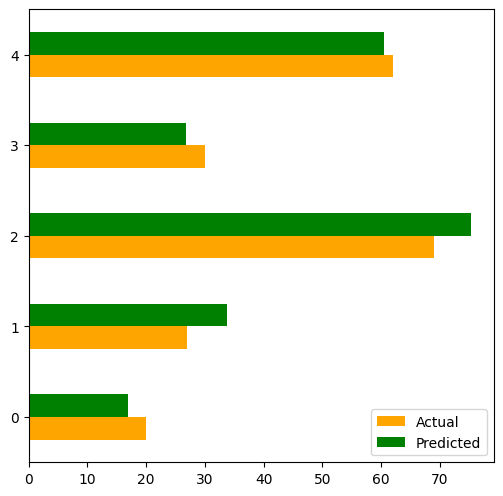

In [53]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.plot(kind='barh',figsize=(6,6),color=('orange','green'))
plt.show()

**Now lets try to predict the score of the student given the number of hours he/she is studying**

In [ ]:
hours=5.4
test=np.array([hours])
test=test.reshape(-1,1)
pred=z.predict([[5.4]])
print("No of hours={}".format(hours))
print("Predicted score = {}".format(pred[0]))

# Model evaluation

In [ ]:
from sklearn import metrics
y_pred=z.predict(x_test)
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error : ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared error : ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Explained Variance score : ",metrics.explained_variance_score(y_test,y_pred))